# Step 5 Linear Convection in 2D

$$\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0$$

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    ##New Library required for projected 3d plots
from matplotlib import cm

In [28]:
#Define the variables similar to 1D, just in 2D
nx = 81
ny = 81
nt = 100
c  = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx 

In [29]:
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx)) # Create 1xn vector of 1's
un = np.ones((ny, nx))

### Assign Initial conditions (Hat function)
u[int(.5/dy):int(1/dy+1),int(.5/dx):int(1/dx+1)] = 2

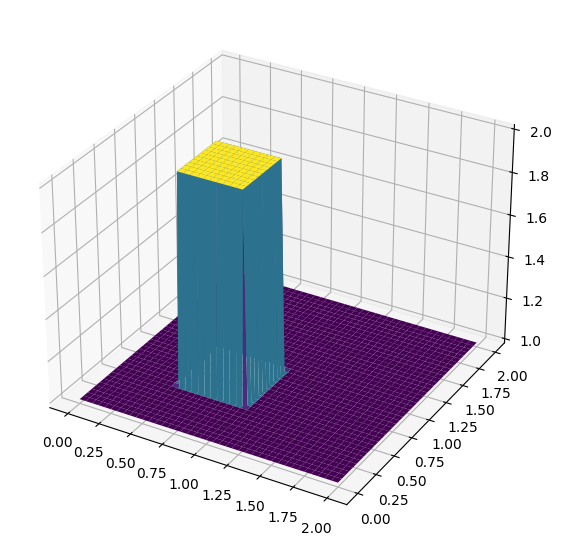

In [30]:
#Plot the hat function in a 3D graph
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection="3d")
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

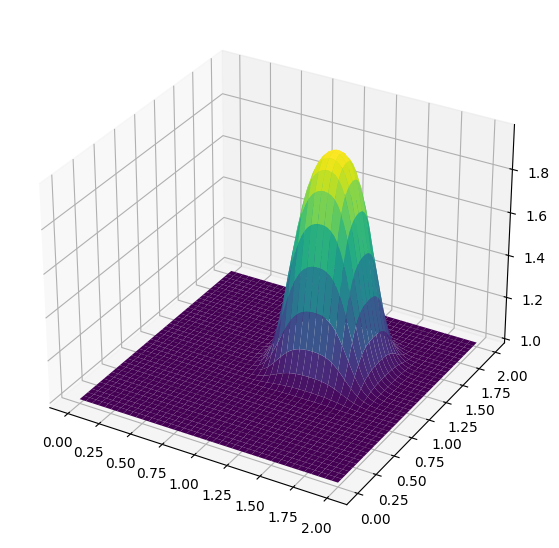

In [41]:
u = np.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

#Iteration by for loops
for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    row, col = u.shape
    for j in range(1, row):
        for i in range(1, col):
            u[j, i] = (un[j, i] - (c * dt / dx * (un[j, i] - un[j, i - 1])) -
                                  (c * dt / dy * (un[j, i] - un[j - 1, i])))
            
            u[0, :] = 1
            u[-1, :] = 1
            u[:, 0] = 1
            u[:, -1] = 1

fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

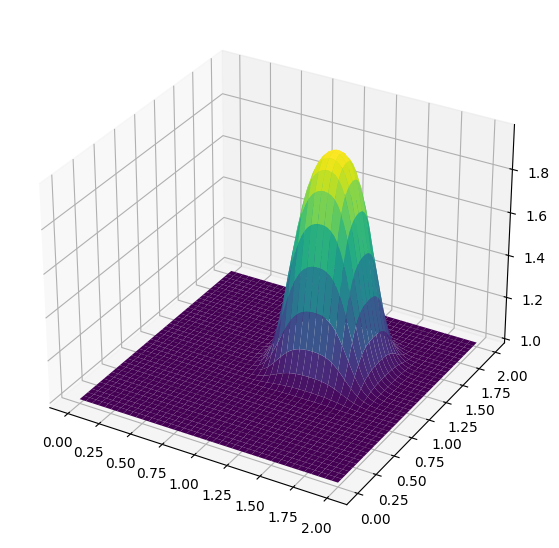

In [42]:
#Iterating with numpy
u = np.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                              (c * dt / dy * (un[1:, 1:] - un[:-1, 1:])))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)